# ETL USER

### IMPORTACION DE LIBRERIAS

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los archivos Parquet
df_user = pd.read_parquet(r"../../data/raw/yelp/user.parquet")
df_review = pd.read_parquet(r"../../data/raw/yelp/review_processed.parquet")

# Filtrar el DataFrame 'user' para que solo contenga los usuarios presentes en 'review_processed'
usuarios_filtrados = df_user[df_user['user_id'].isin(df_review['user_id'].unique())]

# Mostrar los primeros registros del DataFrame filtrado
print(usuarios_filtrados.head())


                   user_id       name  review_count        yelping_since  \
22  FT9CFS39sjZxVjCTrDHmdg  Stephanie           201  2010-06-14 21:44:28   
32  NIhcRW6DWvk1JQhDhXwgOQ        Lia          2288  2005-12-30 13:47:19   
36  rppTTi-kfF8-qyiArNemag      Helen           460  2006-01-24 14:33:32   
38  QJI9OSEn6ujRCtrX06vs1w          J          1982  2007-03-19 18:15:32   
56  RgDVC3ZUBqpEe6Y1kPhIpw     Monica          1282  2009-02-23 14:08:31   

    useful  funny   cool                                              elite  \
22     555    141    203                                          2015,2016   
32   12773   4199   7971  2006,2007,2008,2009,2010,2011,2012,2013,2014,2...   
36     700    149    425            2010,2012,2013,2014,2015,2016,2017,2018   
38   14004   6466   9879                                               2010   
56   12640  10005  11149            2009,2010,2011,2012,2013,2014,2015,2016   

                                              friends  fans  ...  \


In [8]:
usuarios_filtrados.shape

(41863, 22)

In [9]:
usuarios_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41863 entries, 22 to 2105596
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             41863 non-null  object 
 1   name                41863 non-null  object 
 2   review_count        41863 non-null  int64  
 3   yelping_since       41863 non-null  object 
 4   useful              41863 non-null  int64  
 5   funny               41863 non-null  int64  
 6   cool                41863 non-null  int64  
 7   elite               41863 non-null  object 
 8   friends             41863 non-null  object 
 9   fans                41863 non-null  int64  
 10  average_stars       41863 non-null  float64
 11  compliment_hot      41863 non-null  int64  
 12  compliment_more     41863 non-null  int64  
 13  compliment_profile  41863 non-null  int64  
 14  compliment_cute     41863 non-null  int64  
 15  compliment_list     41863 non-null  int64  
 16  compli

### NULOS

In [10]:
usuarios_filtrados.isnull().sum() # Revisamos si hay valores nulos.

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

### DUPLICADOS

In [14]:
usuarios_filtrados.duplicated().sum() # Revisamos si hay valores duplicados.

np.int64(0)

In [15]:
usuarios_filtrados.drop_duplicates(inplace=True)

C:\Users\ElRonconZzZ\AppData\Local\Temp\ipykernel_20576\4097350911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuarios_filtrados.drop_duplicates(inplace=True)


In [16]:
usuarios_filtrados

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
22,FT9CFS39sjZxVjCTrDHmdg,Stephanie,201,2010-06-14 21:44:28,555,141,203,"2015,2016","ElaFwOTdEpkiYPkHMpOwXQ, nbnftigv3fj8oS6k-waLYQ...",5,...,0,0,0,0,11,8,21,21,12,0
32,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,63,46,47,21,518,773,867,867,310,231
36,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,700,149,425,"2010,2012,2013,2014,2015,2016,2017,2018","HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,...,11,2,2,0,16,23,43,43,20,25
38,QJI9OSEn6ujRCtrX06vs1w,J,1982,2007-03-19 18:15:32,14004,6466,9879,2010,"RyPeT_ICAtX8ah9dhDpEFw, W8r4aKPZFT3GPIQQDbqB6Q...",316,...,98,156,52,68,786,3674,2093,2093,562,1509
56,RgDVC3ZUBqpEe6Y1kPhIpw,Monica,1282,2009-02-23 14:08:31,12640,10005,11149,"2009,2010,2011,2012,2013,2014,2015,2016","sHozd2pcOKwHtPr8VlZJfg, 7mL9cvICl8fuCQTM89a-SA...",804,...,102,108,138,65,898,2584,1731,1731,551,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986963,U8Ymjk9m1bFhLZSzxZXPbg,Matteo,1,2018-12-26 04:31:08,1,1,1,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987280,Iu4rW-N9QftkEZCk941e8g,Hannah,20,2013-09-08 18:45:43,8,2,3,,None,0,...,0,0,0,0,1,0,0,0,1,0
1987337,x-5KkHEN5fjwmFnJnapSeQ,Jennifer,1,2021-12-29 18:23:04,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1987670,_CxfRxvMw6cAmkroN9lLhA,Ree,2,2018-03-18 16:18:03,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Eliminar la columna "elite" de usuarios_filtrados
usuarios_filtrados = usuarios_filtrados.drop(columns=['elite'])

# Mostrar los primeros registros para verificar que la columna ha sido eliminada
print(usuarios_filtrados.head())


KeyError: "['elite'] not found in axis"

In [19]:
# Eliminar la columna "elite" de usuarios_filtrados
usuarios_filtrados = usuarios_filtrados.drop(columns=['yelping_since'])

# Mostrar los primeros registros para verificar que la columna ha sido eliminada
print(usuarios_filtrados.head())

                   user_id       name  review_count  useful  funny   cool  \
22  FT9CFS39sjZxVjCTrDHmdg  Stephanie           201     555    141    203   
32  NIhcRW6DWvk1JQhDhXwgOQ        Lia          2288   12773   4199   7971   
36  rppTTi-kfF8-qyiArNemag      Helen           460     700    149    425   
38  QJI9OSEn6ujRCtrX06vs1w          J          1982   14004   6466   9879   
56  RgDVC3ZUBqpEe6Y1kPhIpw     Monica          1282   12640  10005  11149   

                                              friends  fans  average_stars  \
22  ElaFwOTdEpkiYPkHMpOwXQ, nbnftigv3fj8oS6k-waLYQ...     5           3.52   
32  T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...   345           3.69   
36  HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...    49           3.33   
38  RyPeT_ICAtX8ah9dhDpEFw, W8r4aKPZFT3GPIQQDbqB6Q...   316           3.61   
56  sHozd2pcOKwHtPr8VlZJfg, 7mL9cvICl8fuCQTM89a-SA...   804           4.17   

    compliment_hot  compliment_more  compliment_profile  compliment_

In [20]:
usuarios_filtrados

,user_id,name,review_count,useful,funny,cool,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
22,FT9CFS39sjZxVjCTrDHmdg,Stephanie,201,555,141,203,"ElaFwOTdEpkiYPkHMpOwXQ, nbnftigv3fj8oS6k-waLYQ...",5,3.52,10,0,0,0,0,11,8,21,21,12,0
32,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,12773,4199,7971,"T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,3.69,693,63,46,47,21,518,773,867,867,310,231
36,rppTTi-kfF8-qyiArNemag,Helen,460,700,149,425,"HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,3.33,25,11,2,2,0,16,23,43,43,20,25
38,QJI9OSEn6ujRCtrX06vs1w,J,1982,14004,6466,9879,"RyPeT_ICAtX8ah9dhDpEFw, W8r4aKPZFT3GPIQQDbqB6Q...",316,3.61,1286,98,156,52,68,786,3674,2093,2093,562,1509
56,RgDVC3ZUBqpEe6Y1kPhIpw,Monica,1282,12640,10005,11149,"sHozd2pcOKwHtPr8VlZJfg, 7mL9cvICl8fuCQTM89a-SA...",804,4.17,1262,102,108,138,65,898,2584,1731,1731,551,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986963,U8Ymjk9m1bFhLZSzxZXPbg,Matteo,1,1,1,1,None,0,5.00,0,0,0,0,0,0,0,0,0,0,0
1987280,Iu4rW-N9QftkEZCk941e8g,Hannah,20,8,2,3,None,0,3.33,0,0,0,0,0,1,0,0,0,1,0
1987337,x-5KkHEN5fjwmFnJnapSeQ,Jennifer,1,0,0,0,None,0,1.00,0,0,0,0,0,0,0,0,0,0,0
1987670,_CxfRxvMw6cAmkroN9lLhA,Ree,2,0,0,0,None,0,5.00,0,0,0,0,0,0,0,0,0,0,0


# EDA USER

In [21]:
usuarios_filtrados.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000,36340.000000
mean,55.216208,149.591414,61.616318,102.298899,4.421271,3.784547,5.335278,0.930297,0.809741,0.338718,0.256604,5.077876,13.470088,10.037644,10.037644,3.855366,5.400633
std,209.834479,2193.504619,1447.295539,1984.123784,38.846679,0.935190,148.026349,32.498322,50.904742,18.361935,18.869091,101.763992,560.837478,301.259448,301.259448,101.096569,304.720048
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,3.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,7.000000,1.000000,1.000000,0.000000,3.950000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,32.000000,6.000000,9.000000,1.000000,4.430000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,17473.000000,206296.000000,185823.000000,195814.000000,3493.000000,5.000000,21353.000000,4347.000000,7039.000000,2974.000000,2607.000000,13970.000000,101097.000000,49967.000000,49967.000000,15934.000000,56104.000000


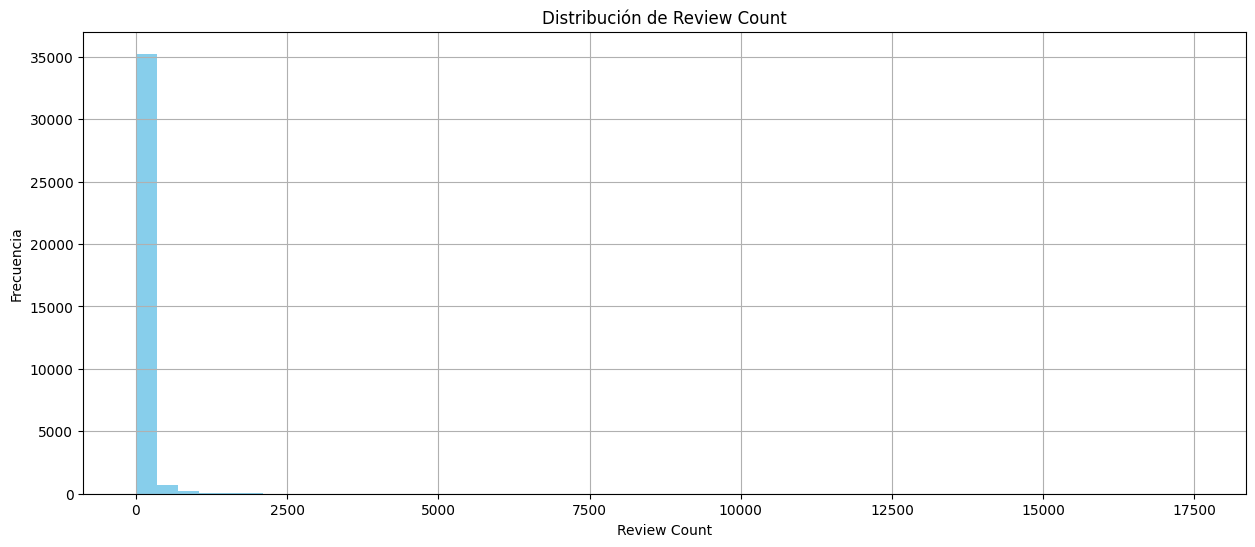

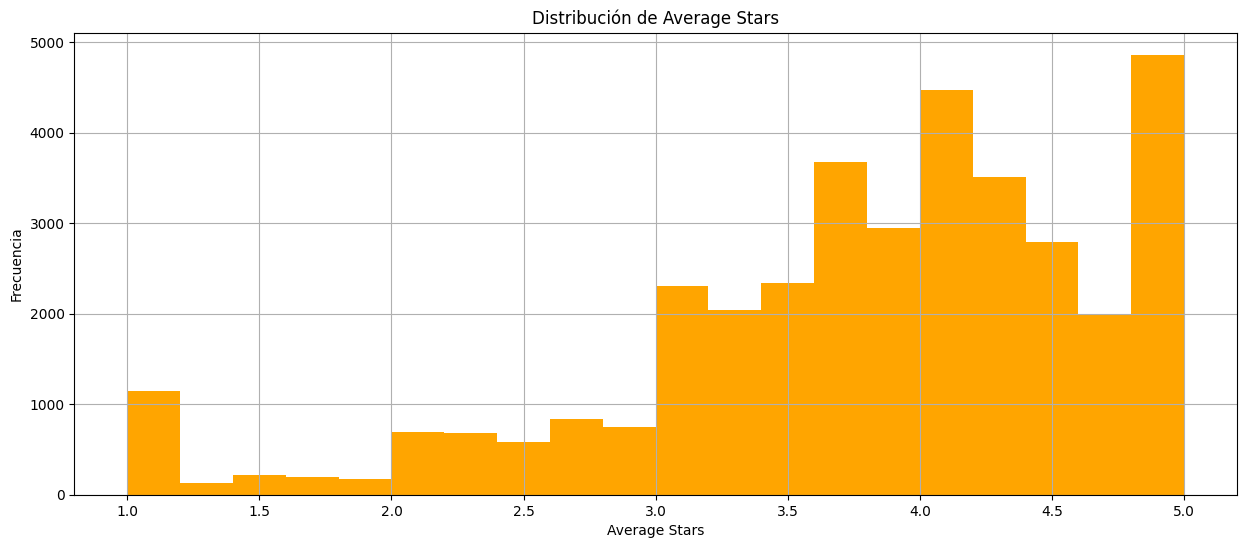

In [24]:
# Histograma para "review_count"
plt.figure(figsize=(15, 6))
usuarios_filtrados['review_count'].hist(bins=50, color='skyblue')
plt.title('Distribución de Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frecuencia')
plt.show()

# Histograma para "average_stars"
plt.figure(figsize=(15, 6))
usuarios_filtrados['average_stars'].hist(bins=20, color='orange')
plt.title('Distribución de Average Stars')
plt.xlabel('Average Stars')
plt.ylabel('Frecuencia')
plt.show()

### RELACION ENTRE VARIABLES

### relación entre las variables numéricas, como "review_count" y "fans"

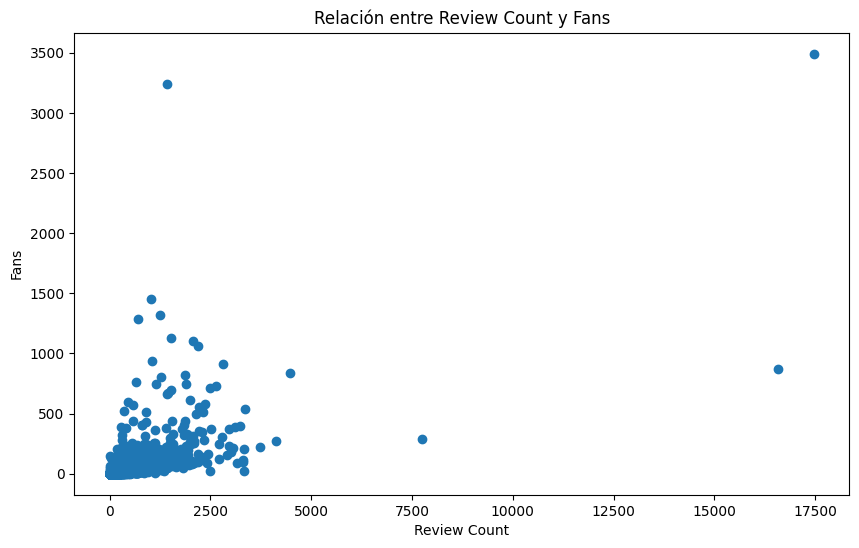

In [26]:
# Gráfico de dispersión entre "review_count" y "fans"
plt.figure(figsize=(10, 6))
plt.scatter(usuarios_filtrados['review_count'], usuarios_filtrados['fans'])
plt.title('Relación entre Review Count y Fans')
plt.xlabel('Review Count')
plt.ylabel('Fans')
plt.show()


### MATRIZ DE CORRELACION

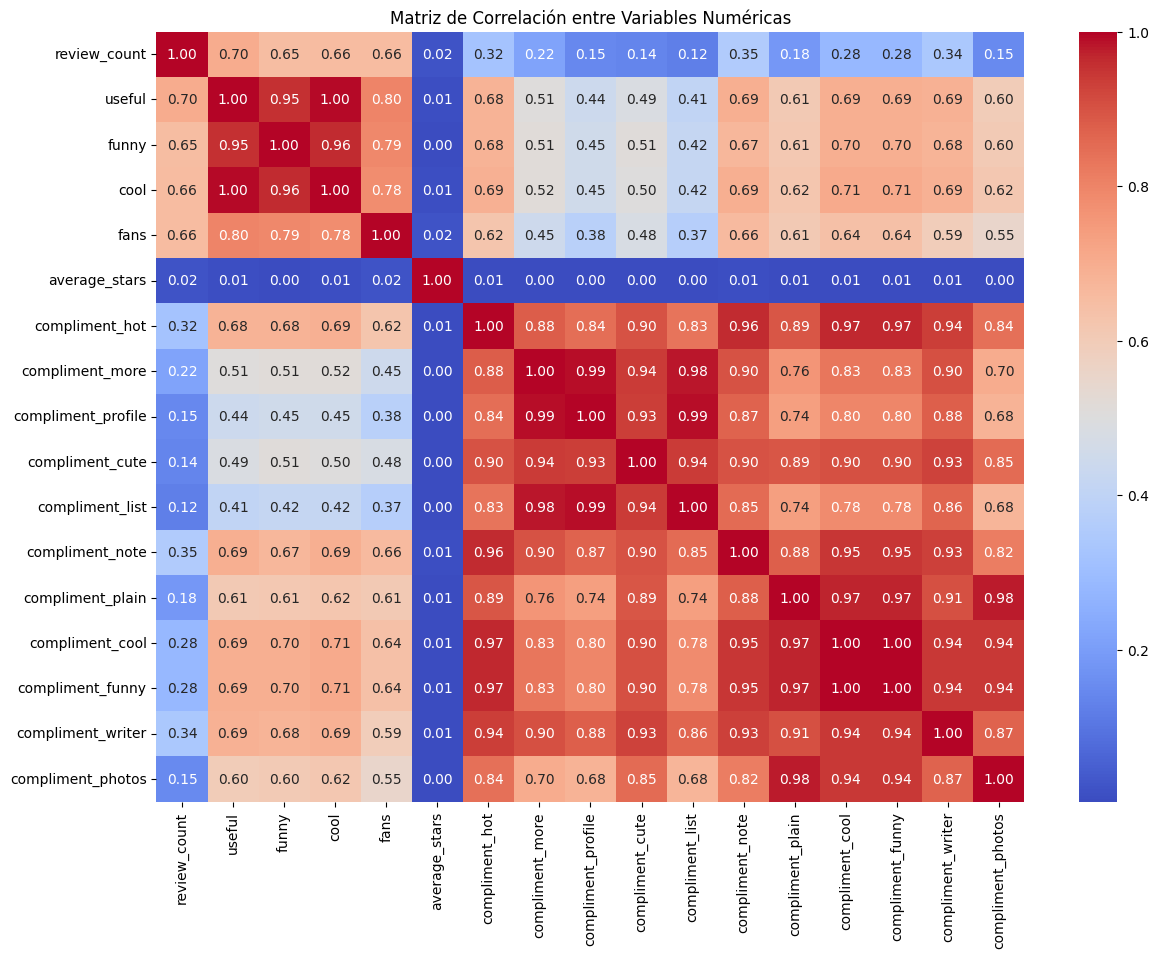

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_user_numerico = usuarios_filtrados.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlacion_user = df_user_numerico.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlacion_user, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()


### DIAGRAMA BOXPLOT

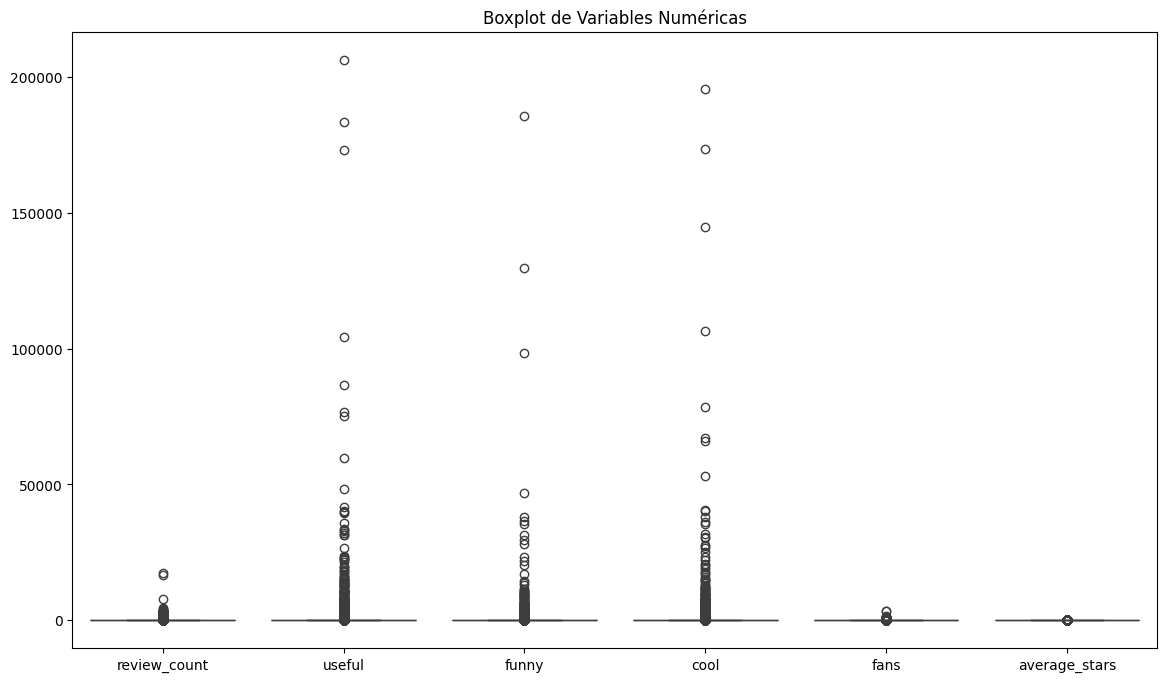

In [32]:
variables_numericas = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars']

plt.figure(figsize=(14, 8))
sns.boxplot(data=usuarios_filtrados[variables_numericas])
plt.title('Boxplot de Variables Numéricas')
plt.show()

### SACTTERPLOTS

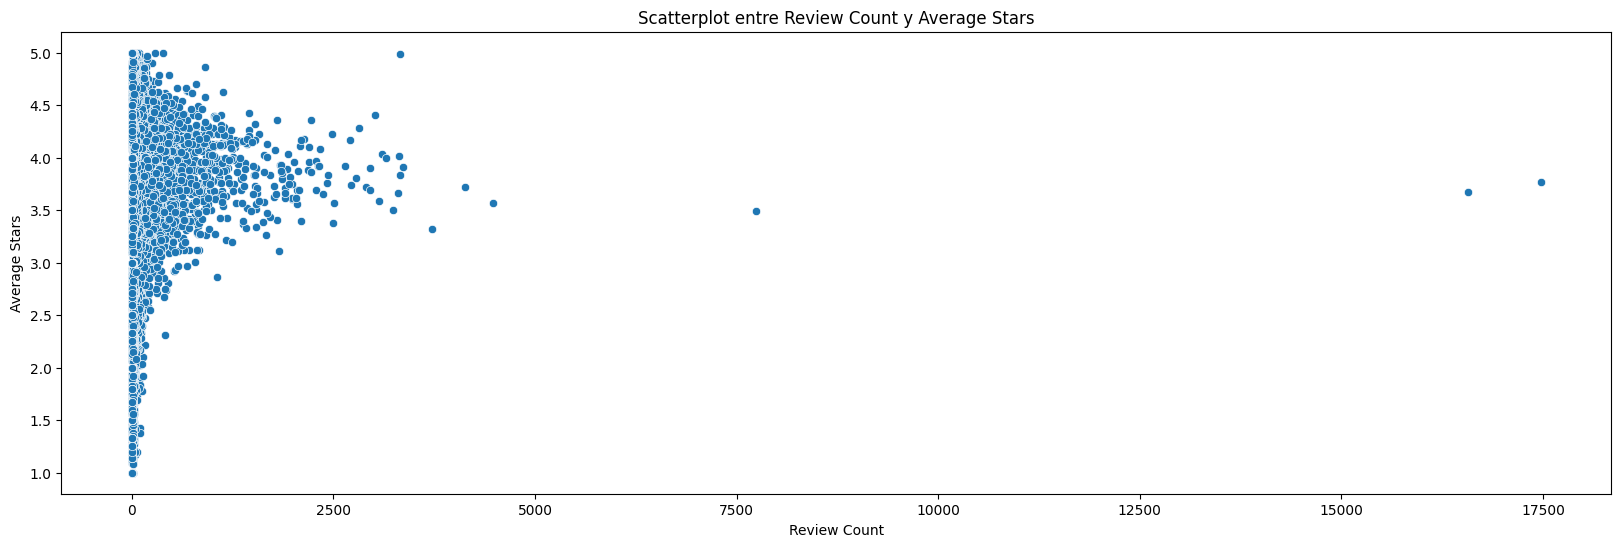

In [33]:
# Scatterplot para "review_count" vs "average_stars"
plt.figure(figsize=(20, 6))
sns.scatterplot(x='review_count', y='average_stars', data=usuarios_filtrados)
plt.title('Scatterplot entre Review Count y Average Stars')
plt.xlabel('Review Count')
plt.ylabel('Average Stars')
plt.show()

In [34]:
usuarios_filtrados.to_parquet(r"../../data/raw/yelp/user_processed.parquet", index= True)
